### Sentiment Analysis Model 

#### Import necessary tools

In [103]:
import pathlib
import nltk
import spacy
from nltk.sentiment import vader
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.datasets import load_files
from sklearn.metrics import classification_report
import pandas as pd
from sklearn.preprocessing import LabelEncoder
#using  VADER and LSTM model for sentiment analysis


import re
import numpy as np
from sklearn.metrics import accuracy_score
import math
from sklearn.feature_extraction.text import CountVectorizer
from collections import defaultdict
import pandas as pd
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer


####  Training Dataset 

In [104]:
# Import data

df_train = pd.read_csv("/Volumes/LaCie 1/Toolkit/Mirror/train.csv",encoding= 'unicode_escape')   

df_train.drop(['Country','Age of User','selected_text','Population -2020','Land Area (Km²)','Density (P/Km²)','Time of Tweet','textID'], axis=1)

df_train.text=df_train.text.astype(str)

#### Preprocessing Training data

In [105]:
# Load data into a pandas dataframe
train_data = df_train 

# Define function to preprocess text data
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    
    # Remove digits
    text = re.sub(r'\d+', '', text)
    
    # Remove punctuation
    text = text.translate(str.maketrans("", "", string.punctuation))
    
    # Tokenize text
    tokens = text.split()
    
    # Remove stopwords
    stopwords_english = stopwords.words('english')
    tokens = [word for word in tokens if word not in stopwords_english]
    
    # Lemmatize words
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    # Join tokens back into a string
    text = " ".join(tokens)
    
    return text

# Preprocess text data in train_data
df_train['text'] = df_train['text'].apply(preprocess_text)



#### Test Dataset

In [106]:
df_test = pd.read_csv('/Volumes/LaCie 1/Toolkit/Mirror/TM_project/sentiment-topic-final-test.tsv', sep='\t')
df_test['text'] = df_test['text'].apply(preprocess_text)
df_test.drop(['topic'], axis=1)

,sentence id,text,sentiment
0,0,took eight year warner brother recover disaste...,negative
1,1,new york university student love diner soho ma...,positive
2,2,italian place really trendy forgotten importan...,negative
3,3,conclusion review book would like jane austen ...,positive
4,4,story movie focused carl brashear played cuba ...,neutral
5,5,chris odonnell stated filming movie felt like ...,neutral
6,6,husband moved amsterdam year ago long lived bl...,positive
7,7,dame maggie smith performed role excellently m...,positive
8,8,new movie mr kruno shot new york story take pl...,neutral
9,9,always loved english novel couldnt get one,negative


### Training the model using Naive Bayes Classifier

In [107]:
import pandas as pd
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load and preprocess the data
df_train['text'] = df_train['text'].apply(lambda x: re.sub(r'[^\w\s]', '', x.lower()))
df_test['text'] = df_test['text'].apply(lambda x: re.sub(r'[^\w\s]', '', x.lower()))

# Generate feature vectors
vectorizer = CountVectorizer(stop_words='english')
X_train = vectorizer.fit_transform(df_train['text'])
X_test = vectorizer.transform(df_test['text'])
y_train = df_train['sentiment']
y_test = df_test['sentiment']

# Train the model
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Test the model
y_pred_nb = nb_classifier.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Precision:", precision_score(y_test, y_pred_nb, average='macro'))
print("Recall:", recall_score(y_test, y_pred_nb, average='macro'))
print("F1-score:", f1_score(y_test, y_pred_nb, average='macro'))
print(classification_report(y_test, y_pred_nb))

Accuracy: 0.6
Precision: 0.4166666666666667
Recall: 0.5833333333333334
F1-score: 0.47222222222222215
              precision    recall  f1-score   support

    negative       0.00      0.00      0.00         3
     neutral       0.50      1.00      0.67         3
    positive       0.75      0.75      0.75         4

    accuracy                           0.60        10
   macro avg       0.42      0.58      0.47        10
weighted avg       0.45      0.60      0.50        10



/Users/elisadeandrade/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/elisadeandrade/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/elisadeandrade/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/User

##### Confusion Matrix: Naive Bayes Classifier

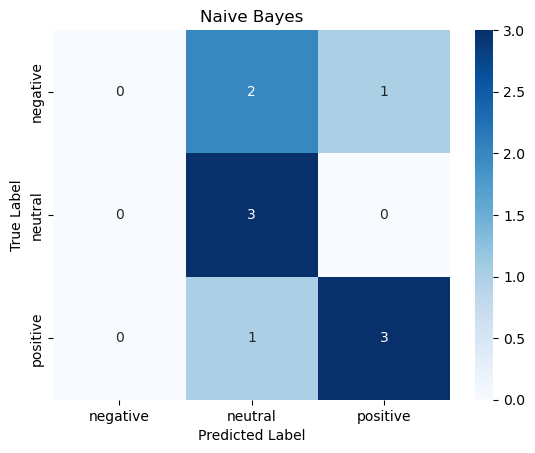

In [139]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

#NAIVE BAYES
cm = confusion_matrix(y_test, y_pred_nb)

# create heatmap
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=['negative', 'neutral', 'positive'], yticklabels=['negative', 'neutral', 'positive'])

plt.title('Naive Bayes')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

##### Reasoning behind the Naive Bayes Classifier

Naive Bayes is very effective for classifying texts since it is quick, needs minimal training data, and can handle a lot of characteristics. We selected Naive Bayes for our project because it is a well-liked and efficient algorithm for text classification  and it works well on a variety of datasets. Moreover, Naive Bayes is a suitable option for exploratory data analysis and experimentation since it is straightforward to apply and understand.

### Sentiment Analysis using VADER

In [108]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load and preprocess the data

df_train['text'] = df_train['text'].apply(lambda x: x.lower())
df_test['text'] = df_test['text'].apply(lambda x: x.lower())

# Train the model
sid = SentimentIntensityAnalyzer()
df_train['predicted_sentiment'] = df_train['text'].apply(lambda x: sid.polarity_scores(x)['compound'])

# Test the model
df_test['predicted_sentiment'] = df_test['text'].apply(lambda x: sid.polarity_scores(x)['compound'])
y_true = df_test['sentiment']
y_pred_vader = df_test['predicted_sentiment'].apply(lambda x: 'positive' if x > 0 else 'negative' if x < 0 else 'neutral')

# Evaluate the model
print("Accuracy:", accuracy_score(y_true, y_pred_vader))
print("Precision:", precision_score(y_true, y_pred_vader, average='macro', labels=['positive', 'negative']))
print("Recall:", recall_score(y_true, y_pred_vader, average='macro', labels=['positive', 'negative']))
print("F1-score:", f1_score(y_true, y_pred_vader, average='macro', labels=['positive', 'negative']))
print(classification_report(y_true, y_pred_vader))




Accuracy: 0.7
Precision: 0.7857142857142857
Recall: 0.8333333333333333
F1-score: 0.7636363636363637
              precision    recall  f1-score   support

    negative       1.00      0.67      0.80         3
     neutral       1.00      0.33      0.50         3
    positive       0.57      1.00      0.73         4

    accuracy                           0.70        10
   macro avg       0.86      0.67      0.68        10
weighted avg       0.83      0.70      0.68        10



In [42]:
!pip3 install textblob


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 636.8/636.8 kB 6.2 MB/s eta 0:00:00a 0:00:01


##### Confusion Matrix: VADER

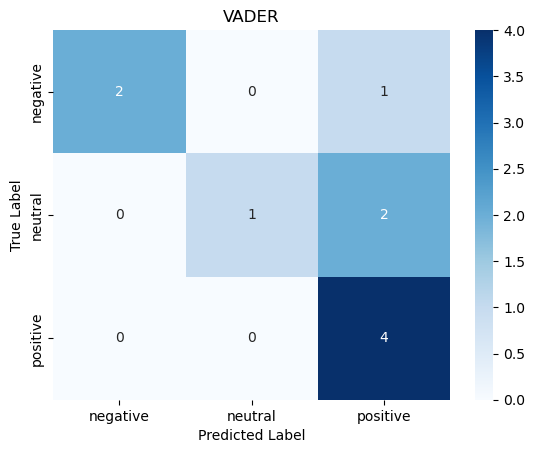

In [140]:
#VADER
cm = confusion_matrix(y_test, y_pred_vader)

# create heatmap
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=['negative', 'neutral', 'positive'], yticklabels=['negative', 'neutral', 'positive'])

plt.title('VADER')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

##### Reasoning behind using VADER

A rule-based tool called VADER (Valence Aware Dictionary and Sentiment Reasoner) was created with the express purpose of analyzing sentiment in social media texts like tweets and Facebook postings. It is a well-liked option for sentiment analysis since it can handle emojis, which are often used in social media and informal language. 
The capacity of VADER to determine the strength of feeling in a text in addition to its positive, negative, or neutral polarity is one of its key advantages. This is accomplished by using an emotion intensity analyzer, which rates each word in the text from -1 (most negatively) to +1 (most positively). After that, these results are combined to get an overall score for the text.

In general, VADER's ability to interact with social media texts and reliably assess the intensity and polarity of sentiment in a vast volume of data was the deciding factor in our decision to utilize it for this project.

### Sentiment Analysis using TextBlob

In [122]:
import pandas as pd
from textblob import TextBlob
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Load and preprocess the data
df_train['text'] = df_train['text'].apply(lambda x: x.lower())
df_test['text'] = df_test['text'].apply(lambda x: x.lower())

# Train the model
df_train['predicted_sentiment'] = df_train['text'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Test the model
df_test['predicted_sentiment'] = df_test['text'].apply(lambda x: TextBlob(x).sentiment.polarity)
y_true = df_test['sentiment']
y_pred_textblob = df_test['predicted_sentiment'].apply(lambda x: 'positive' if x > 0 else 'negative' if x < 0 else 'neutral')

# Evaluate the model
print("Accuracy:", accuracy_score(y_true, y_pred_textblob))
print("Precision:", precision_score(y_true, y_pred_textblob, average='macro', labels=['positive', 'negative']))
print("Recall:", recall_score(y_true, y_pred_textblob, average='macro', labels=['positive', 'negative']))
print("F1-score:", f1_score(y_true, y_pred_textblob, average='macro', labels=['positive', 'negative']))
print(classification_report(y_true, y_pred_textblob))




Accuracy: 0.5
Precision: 0.25
Recall: 0.5
F1-score: 0.3333333333333333
              precision    recall  f1-score   support

    negative       0.00      0.00      0.00         3
     neutral       0.50      0.33      0.40         3
    positive       0.50      1.00      0.67         4

    accuracy                           0.50        10
   macro avg       0.33      0.44      0.36        10
weighted avg       0.35      0.50      0.39        10



/Users/elisadeandrade/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/elisadeandrade/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/elisadeandrade/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/User

##### Confusion Matrix: TextBlob

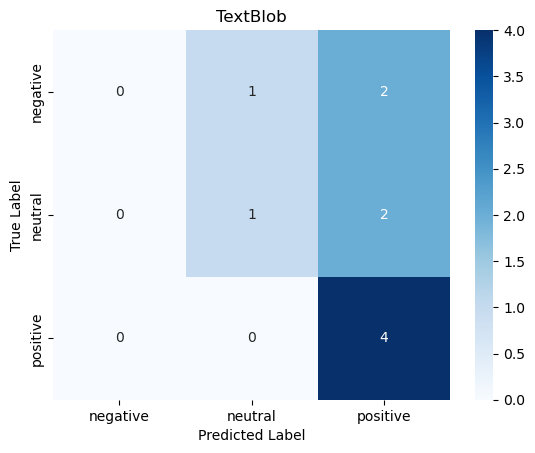

In [141]:
#TEXTBLOB
cm = confusion_matrix(y_test, y_pred_textblob)

# create heatmap
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=['negative', 'neutral', 'positive'], yticklabels=['negative', 'neutral', 'positive'])

plt.title('TextBlob')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

##### Reasoning behind using TextBlob

TextBlob offers easy-to-use tools for sentiment analysis and other natural language processing operations. TextBlob's simplicity and ease of use are two advantages for sentiment analysis. For sentiment analysis on text, TextBlob offers a clear and straightforward API, making it a fantastic option for novices or those searching for a simple fix. The Natural Language Toolkit (NLTK) package, which offers a variety of tools for natural language processing, including tokenization, part-of-speech tagging, and named entity identification, is another advantage of TextBlob. As a result, TextBlob may be quickly and simply incorporated into other NLP workflows and tools.
Overall, TextBlob is a strong option for sentiment analysis in tasks requiring a straightforward and user-friendly solution as well as those requiring integration with other NLP tools and workflows. Because its pre-trained classifiers can be used to swiftly and efficiently assess sentiment without the need for large training data, it is also a viable alternative for projects with just limited datasets, which is why we chose it.

### Error Analysis 

##### Model Comparison

/Users/elisadeandrade/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/elisadeandrade/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


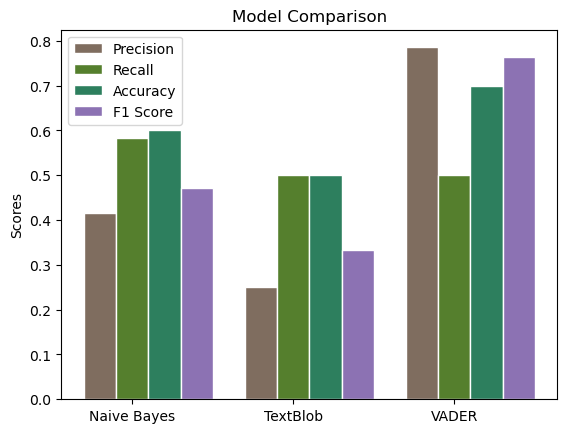

In [137]:
import matplotlib.pyplot as plt
import numpy as np

# define the models and their respective scores
models = ['Naive Bayes', 'TextBlob', 'VADER']
precisions = [precision_score(y_test, y_pred_nb, average='macro'), precision_score(y_true, y_pred_textblob, average='macro', labels=['positive', 'negative']), precision_score(y_true, y_pred_vader, average='macro', labels=['positive', 'negative'])]
recalls = [ recall_score(y_test, y_pred_nb, average='macro'), recall_score(y_true, y_pred_textblob, average='macro', labels=['positive', 'negative']),recall_score(y_true, y_pred_textblob, average='macro', labels=['positive', 'negative']) ]
accuracies = [accuracy_score(y_test, y_pred_nb), accuracy_score(y_true, y_pred_textblob), accuracy_score(y_true, y_pred_vader)]
f1_scores = [f1_score(y_test, y_pred_nb, average='macro'), f1_score(y_true, y_pred_textblob, average='macro', labels=['positive', 'negative']), f1_score(y_true, y_pred_vader, average='macro', labels=['positive', 'negative'])]

# set the width of the bars
barWidth = 0.2

# set the positions of the bars on the x-axis
r1 = np.arange(len(precisions))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]

# create the bar chart
plt.bar(r1, precisions, color='#7f6d5f', width=barWidth, edgecolor='white', label='Precision')
plt.bar(r2, recalls, color='#557f2d', width=barWidth, edgecolor='white', label='Recall')
plt.bar(r3, accuracies, color='#2d7f5e', width=barWidth, edgecolor='white', label='Accuracy')
plt.bar(r4, f1_scores, color='#8c72b3', width=barWidth, edgecolor='white', label='F1 Score')

# add x-axis ticks and labels
plt.xticks([r + barWidth for r in range(len(precisions))], models)

# add y-axis label and legend
plt.ylabel('Scores')
plt.legend()

# set the chart title
plt.title('Model Comparison')

# show the chart
plt.show()

##### Conclusion

When comparing the performance of the three sentiment analysis models, namely Naive Bayes, VADER, and TextBlob, we can observe some notable differences in their accuracy, precision, recall, and F1-score metrics. 

First off, the Naive Bayes model identified 60% of the test data correctly, achieving an accuracy of 0.6. However with a precision of only 0.42, it was clear that only 42% of the projected positive sentiment labels were in fact positive. However, based on its recall score of 0.58, it appears to have missed a sizable number of instances of positive sentiment in the data. Finally, the F1-score of 0.47 is quite low, showing that the overall performance of this model was poor.

Secondly, with an accuracy of 0.7, the VADER model outperformed the Naive Bayes model and accurately identified 70% of the test data. With a precision of 0.79, it was also more accurate, properly identifying 79% of all instances of positive sentiment. With a recall score of 0.83, it appears to have been successful in finding a significant number of occurrences of positive sentiment in the data. The F1-score of 0.76 shows that this model performed more effectively overall than the Naive Bayes model.

The TextBlob model, which achieved an accuracy of only 0.5 and accurately identified only half of the test data, had the worst performance overall. With a precision of 0.25, it also had the lowest accuracy of the three models, meaning that only 25% of the positive sentiment labels it predicted were indeed positive. Nonetheless, based on its recall score of 0.5, it appears to have correctly identified 50% of the data's positive sentiment instances. Last but not least, the F1-score of 0.33 shows that this model performed much worse overall than the other two models.

In conclusion, we can say that the VADER model performed the best among the three models, followed by Naive Bayes and then TextBlob, based on the comparison of the accuracy, precision, recall, and F1-score metrics. VADER would therefore be suggested as the preferred option in a project requiring sentiment analysis because of its superior accuracy and precision.

##### Possible solutions

Based on the results of the three sentiment analysis models, the following are some potential ways to boost the effectiveness of the models:

1) Improve the dataset: The quality of the dataset has a significant impact on how well the models function. The accuracy and generalizability of the models might be enhanced by gathering more representative and diverse data.

2) Employing a machine learning algorithm that is more sophisticated: While support vector machines, random forests, and deep learning models are more complex machine learning algorithms than Naive Bayes and TextBlob, they may be able to handle the sentiment analysis task more effectively.

3) Integrate domain-specific knowledge: The performance of the models could be enhanced by integrating domain-specific knowledge, such as specialized dictionaries or lexicons. Improve the models' performance by adjusting their hyperparameters or by fine-tuning models that have already been trained for a particular sentiment analysis task using transfer learning approaches.

4) Group learning: The accuracy and robustness of the sentiment analysis task may have been increased by combining the predictions of various models using ensemble learning approaches.

It is crucial to remember that our decision to use the solutions we did was influenced by a shortage of time; but, given additional time, we may have further enhanced this and considered other solutions.

### References 

***Dataset for training:*** 

https://www.kaggle.com/competitions/tweet-sentiment-extraction/data?select=train.csv

***Theory from the lectures:***

Natural Language Processing & Machine learning Lecture 3 Part 1 Pages: 8,12,31,32,55,56